In [1]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
#import train and test CSV files
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")

#take a look at the training data
# train.describe(include="all")

In [3]:
#get a list of the features within the dataset
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [23]:
# 샘플로 찍어보자 
train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup
384,385,0,3,male,NaN,0,0,349227,7.8958,NaN,S,1
533,534,1,3,female,NaN,0,2,2668,22.3583,NaN,C,2
97,98,1,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C,3
877,878,0,3,male,19.0,0,0,349212,7.8958,NaN,S,1
807,808,0,3,female,18.0,0,0,347087,7.7750,NaN,S,1


Percentage of females who survived: 74.2038216561
Percentage of males who survived: 18.8908145581


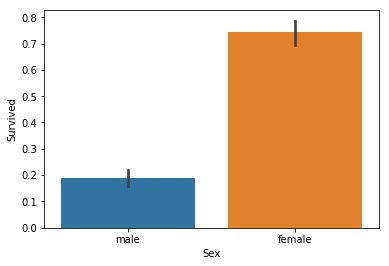

In [5]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.962962963
Percentage of Pclass = 2 who survived: 47.2826086957
Percentage of Pclass = 3 who survived: 24.2362525458


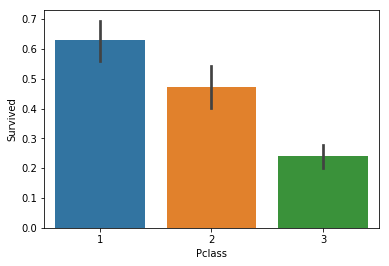

In [6]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [21]:
# 이름은 생존 여부에 전혀 관계가 없을 것 같다 (개인적인 생각)
# 따라서 Drop 해 본다
train = train.drop(['Name'], axis = 1)
# train.describe(include="all")

train.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
358,359,1,3,female,NaN,0,0,330931,7.8792,NaN,Q
657,658,0,3,female,32.0,1,1,364849,15.5000,NaN,Q
69,70,0,3,male,26.0,2,0,315151,8.6625,NaN,S
418,419,0,2,male,30.0,0,0,28228,13.0000,NaN,S
183,184,1,2,male,1.0,2,1,230136,39.0000,F4,S


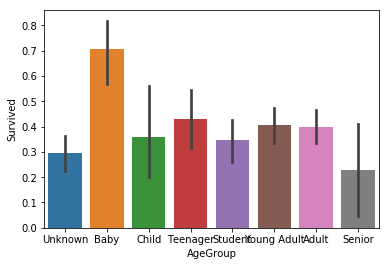

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
541,542,0,3,female,9.0,4,2,347082,31.2750,NaN,S,Child
193,194,1,2,male,3.0,1,1,230080,26.0000,F2,S,Baby
405,406,0,2,male,34.0,1,0,28664,21.0000,NaN,S,Young Adult
474,475,0,3,female,22.0,0,0,7553,9.8375,NaN,S,Student
248,249,1,1,male,37.0,1,1,11751,52.5542,D35,S,Adult


In [8]:
#sort the ages into logical categories
train["Age"] = train["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()


#see a sample of the dataset to get an idea of the variables
train.sample(5)

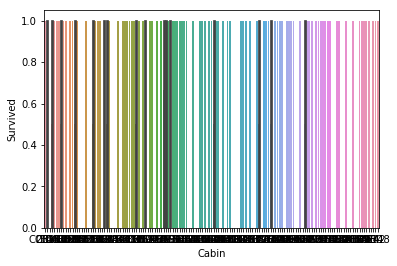

In [9]:
#draw a bar plot of survival by Cabin
sns.barplot(x="Cabin", y="Survived", data=train)

# 이대로는 의미 없는 데이터 일듯 가공이 필요해 보인다.

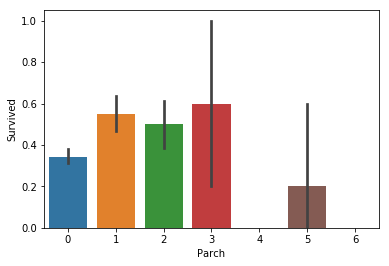

In [10]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

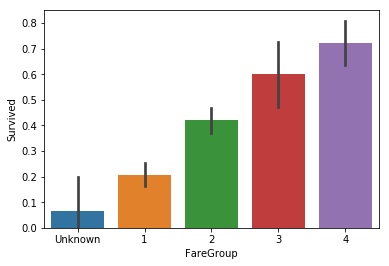

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareGroup
388,389,0,3,male,NaN,0,0,367655,7.7292,NaN,Q,1
67,68,0,3,male,19.0,0,0,S.P. 3464,8.1583,NaN,S,1
525,526,0,3,male,40.5,0,0,367232,7.7500,NaN,Q,1
802,803,1,1,male,11.0,1,2,113760,120.0000,B96 B98,S,4
539,540,1,1,female,22.0,0,2,13568,49.5000,B39,C,2


In [22]:
# 운임은 어느 정도 부유 척도에 영향이 있을듯한데, 그대로 쓰기는 힘들어 
# 그룹핑을 해본다

#sort the ages into logical categories
train["Fare"] = train["Fare"].fillna(-0.5)

bins = [-1, 0, 10, 50, 70, np.inf]
labels = ['Unknown', '1', '2', '3', '4']

train['FareGroup'] = pd.cut(train["Fare"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="FareGroup", y="Survived", data=train)
plt.show()


# 제대로 됬는지 샘플을 찍어보자
train.sample(5)

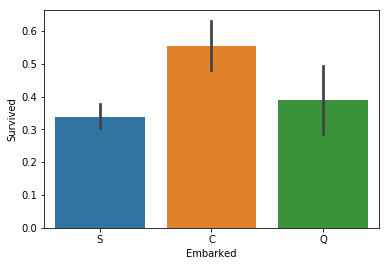

In [19]:
# 승선지에 따른 생존 여부 표시
sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

# 유의미 한지는 조금 더 고민해 보자
# 일반적으로는 승선지가 생존 여부에는 관계가 없을 것 같다

In [12]:
# 변경해 본 트레이닝 셋을 저장해 보자 
train.to_csv('remake_blackrains.csv', index=False)